# We stratify the 100 collaborators
---

+ 1. People who left town (2) 
+ 2. People with poor social life (18)
+ 3. People with moderate social life  (59)
+ 4. Peoiple with highly active social life (21) 

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [63]:
ff1=pd.read_csv('friendseries.csv',parse_dates=True)
ff=ff1.pivot('UID','Timestep','FriendCount')
ff.columns=pd.to_datetime(ff.columns)

In [64]:
Ff=ff#.transpose()
F=ff.transpose().fillna(-10000).sum().sort_values()

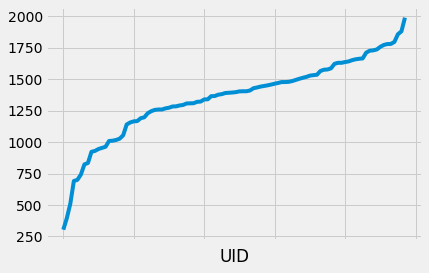

In [93]:
p_left_town=F[F<0]
p_soc_l=F[(F>0) & (F<1100)]  # low social
p_soc_m=F[(F>1100) & (F<1600)]  # medium social
p_soc_h=F[(F>1600)]   # high social
F[F>0].plot()

In [94]:
# these people seem to have left
p_left_town  

UID
UID-0ce365b3ff   -549577.0
UID-1ebc347927   -219750.0
dtype: float64

In [114]:
dlt=ff1[['UID','Lat','Lon']].drop_duplicates().set_index('UID').loc[ff1.set_index('UID').loc[p_left_town.index.values].index.drop_duplicates()]

In [113]:
dls=ff1[['UID','Lat','Lon']].drop_duplicates().set_index('UID').loc[ff1.set_index('UID').loc[p_soc_l.index.values].index.drop_duplicates()]

In [112]:
dms=ff1[['UID','Lat','Lon']].drop_duplicates().set_index('UID').loc[ff1.set_index('UID').loc[p_soc_m.index.values].index.drop_duplicates()]

In [ ]:
dhs=ff1[['UID','Lat','Lon']].drop_duplicates().set_index('UID').loc[ff1.set_index('UID').loc[p_soc_h.index.values].index.drop_duplicates()]

In [115]:
def getVariableName(row):
    return str(row.Lat-0.5)+'#'+str(row.Lat+0.5)+'#'+str(row.Lon-0.5)+'#'+str(row.Lon+0.5)+'#'

In [116]:
dlt['varname']=dlt.apply(getVariableName,axis=1)
dls['varname']=dls.apply(getVariableName,axis=1)
dms['varname']=dms.apply(getVariableName,axis=1)
dhs['varname']=dhs.apply(getVariableName,axis=1)


In [118]:
dlt.to_csv('left_town.csv')
dls.to_csv('low_soc.csv')
dms.to_csv('med_soc.csv')
dhs.to_csv('hig_soc.csv')


In [119]:
def readVarName(csvfile):
    return pd.read_csv(csvfile).varname.values

In [125]:
readVarName('low_soc.csv')

array(['91.5#92.5#91.5#92.5#', '28.5#29.5#28.5#29.5#',
       '86.5#87.5#86.5#87.5#', '14.5#15.5#14.5#15.5#',
       '60.5#61.5#60.5#61.5#', '85.5#86.5#85.5#86.5#',
       '21.5#22.5#21.5#22.5#', '90.5#91.5#90.5#91.5#',
       '37.5#38.5#37.5#38.5#', '2.5#3.5#2.5#3.5#', '84.5#85.5#84.5#85.5#',
       '70.5#71.5#70.5#71.5#', '71.5#72.5#71.5#72.5#',
       '46.5#47.5#46.5#47.5#', '97.5#98.5#97.5#98.5#',
       '66.5#67.5#66.5#67.5#', '62.5#63.5#62.5#63.5#',
       '49.5#50.5#49.5#50.5#'], dtype=object)